In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
# Cargamos los dataframes
df_store = pd.read_csv('../rossmann-store-sales/store.csv')
df_train = pd.read_csv('../rossmann-store-sales/train.csv')
df_test = pd.read_csv('../rossmann-store-sales/test.csv')

/Users/francotestori/dsuba/series_temporales/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [41]:
# Analizamos el dataframe de train
df_train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [86]:
df_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,week,year_month,year_week
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,2015-07,2015-31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,2015-07,2015-31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,2015-07,2015-31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,2015-07,2015-31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,2015-07,2015-31


In [42]:
def apply_date_format(df):
    df['Date'] = pd.to_datetime(df['Date'])
    date_aux = df['Date']

    df['year'] = date_aux.dt.year
    df['month'] = date_aux.dt.month
    df['week'] = date_aux.dt.isocalendar().week
    df['year_month'] = date_aux.dt.strftime('%Y-%m')
    df['year_week'] = date_aux.dt.strftime('%Y-%V')

    return df

In [43]:
df_train = apply_date_format(df=df_train)

In [44]:
# Resumen de las variables
round(df_train.describe(),2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,week
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18,2013.83,5.85,23.62
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38,0.78,3.33,14.43
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,2013.00,1.00,1.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,2013.00,3.00,11.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,2014.00,6.00,22.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,2014.00,8.00,35.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00,2015.00,12.00,52.00


In [45]:
nan_by_col = []
for col in df_train.columns:
    nan_by_col.append({
        'column': col,
        'nan_count': df_train[col].isna().sum()
    })

pd.DataFrame(nan_by_col)

,column,nan_count
0,Store,0
1,DayOfWeek,0
2,Date,0
3,Sales,0
4,Customers,0
5,Open,0
6,Promo,0
7,StateHoliday,0
8,SchoolHoliday,0
9,year,0


In [46]:
store_sales = df_train[['Store','Date']].groupby('Store').count()
print('Cantidad Mínima de puntos:', store_sales.Date.min())
print('Cantidad Máxima de puntos:', store_sales.Date.max())

Cantidad Mínima de puntos: 758
Cantidad Máxima de puntos: 942


In [47]:
under_942 = store_sales[store_sales['Date'] < 942]
print(f"Cantidad de tiendas con Menos de 942 días: {len(under_942)}")

Cantidad de tiendas con Menos de 942 días: 181


In [48]:
print(f'Cantidad de tiendas: {len(df_train.Store.unique())}')

Cantidad de tiendas: 1115


In [49]:
print(f'Cantidad de días: {len(df_train.Date.unique())}')
print(f'Minimo de días: {df_train.Date.min()}')
print(f'Maximo de días: {df_train.Date.max()}')

Cantidad de días: 942
Minimo de días: 2013-01-01 00:00:00
Maximo de días: 2015-07-31 00:00:00


In [50]:
def plot_sales_time_series(df_to_plot, grouping_col):
    x_y_cols = ['Sales', grouping_col]
    df_aux = df_to_plot[x_y_cols].groupby(grouping_col).sum().reset_index()
    plt.plot(df_aux[grouping_col], df_aux.Sales)
    plt.title(f'Sales plot grouped by {grouping_col}')
    plt.show()

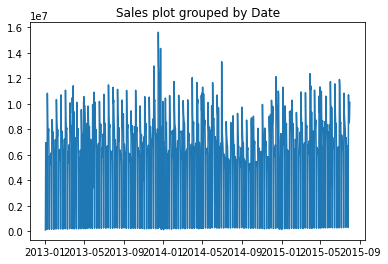

In [51]:
plot_sales_time_series(
    df_to_plot=df_train,
    grouping_col='Date'
)

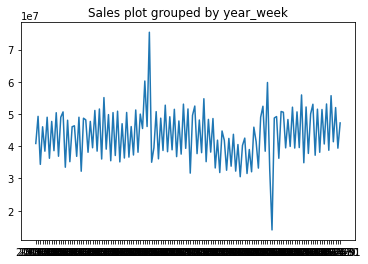

In [52]:
plot_sales_time_series(
    df_to_plot=df_train,
    grouping_col='year_week'
)

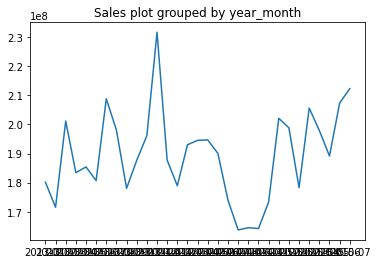

In [53]:
plot_sales_time_series(
    df_to_plot=df_train,
    grouping_col='year_month'
)

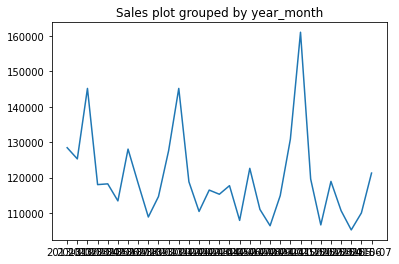

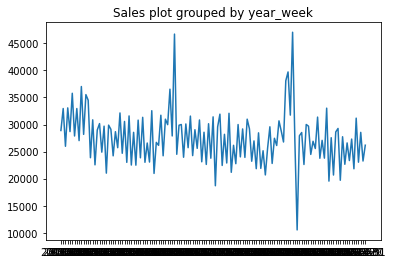

In [54]:
# Visualizamos las ventas para una unica tienda seleccionada
store = 1
df_selected_store = df_train.loc[df_train['Store'] == store]

plot_sales_time_series(
    df_to_plot=df_selected_store,
    grouping_col='year_month'
)

plot_sales_time_series(
    df_to_plot=df_selected_store,
    grouping_col='year_week'
)


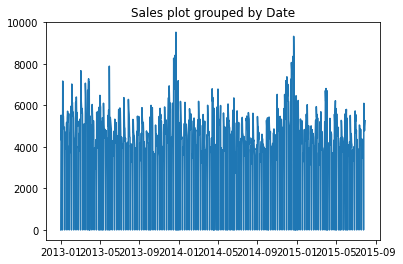

In [55]:
# Visualizamos las ventas para una unica tienda seleccionada
# solo para las fechas en las que estuvo abierta
df_selected_store_open = df_selected_store.loc[df_train['Open'] == 1]
plot_sales_time_series(
    df_to_plot=df_selected_store,
    grouping_col='Date'
)

<AxesSubplot:>

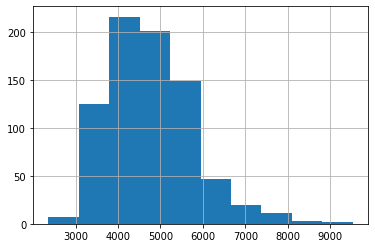

In [56]:
# Vemos la distribución de la serie con un histograma
df_selected_store_open.Sales.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x130c46f10>,
 'caps': [<matplotlib.lines.Line2D at 0x130c55670>,
 'boxes': [<matplotlib.lines.Line2D at 0x130c46b80>],
 'medians': [<matplotlib.lines.Line2D at 0x130c55d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x130c60160>],
 'means': []}

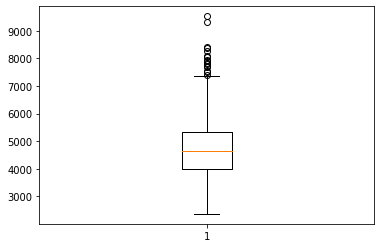

In [57]:
# Vemos los números más representativos con un Box Plot
plt.boxplot(df_selected_store_open.Sales)

In [58]:
pd.DataFrame(df_selected_store_open.Sales.describe())

,Sales
count,781.000000
mean,4759.096031
std,1012.106393
min,2362.000000
25%,4000.000000
50%,4647.000000
75%,5348.000000
max,9528.000000


In [59]:
def plot_rolling_average_sales(df_to_plot, time_window: int):
    rolling_avg_series = np.convolve(
        df_to_plot.Sales,
        np.ones(time_window)/time_window,
        mode='same'
    )

    # Daily sales
    plt.plot(df_to_plot.Date, df_to_plot.Sales)
    # Rolling Average sales
    plt.plot(df_to_plot.Date, rolling_avg_series)

    plt.title(f'Rolling Average Mean for {time_window} days time window')
    plt.show()

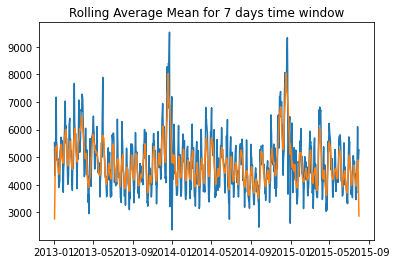

In [60]:
plot_rolling_average_sales(
    df_to_plot=df_selected_store_open,
    time_window=7
)

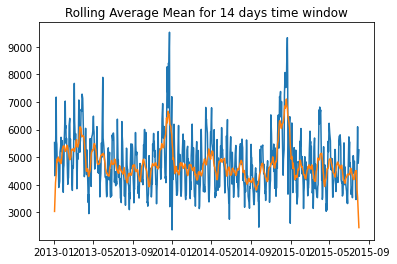

In [61]:
plot_rolling_average_sales(
    df_to_plot=df_selected_store_open,
    time_window=14
)


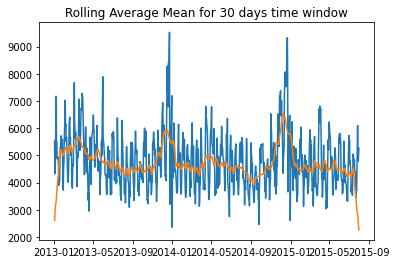

In [62]:
plot_rolling_average_sales(
    df_to_plot=df_selected_store_open,
    time_window=30
)


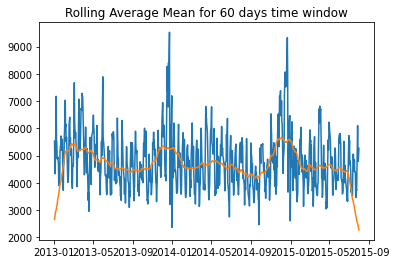

In [63]:
plot_rolling_average_sales(
    df_to_plot=df_selected_store_open,
    time_window=60
)


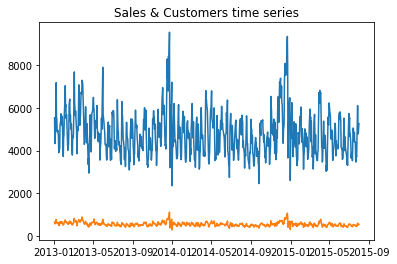

In [64]:
# Ventas y Clientes
plt.plot(df_selected_store_open.Date, df_selected_store_open.Sales)
plt.plot(df_selected_store_open.Date, df_selected_store_open.Customers)

plt.title(f'Sales & Customers time series')
plt.show()


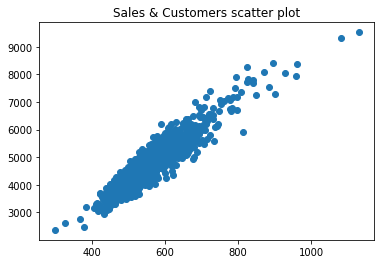

In [65]:
plt.scatter(df_selected_store_open.Customers, df_selected_store_open.Sales)
plt.title(f'Sales & Customers scatter plot')
plt.show()

In [66]:
def plot_multiple_sales_time_series(df_to_plot, segmentation_col: str, grouping_col: str):
    x_y_cols = ['Sales', grouping_col]

    for segment in df_train[segmentation_col].unique():
        df_aux = df_to_plot.loc[df_to_plot[segmentation_col]==segment, x_y_cols].groupby(grouping_col).sum().reset_index()
        plt.plot(df_aux[grouping_col], df_aux.Sales)
        plt.ylim(ymin=0)

    plt.title(f'Sales Time Series for {segmentation_col} grouped by {grouping_col}')
    plt.show()

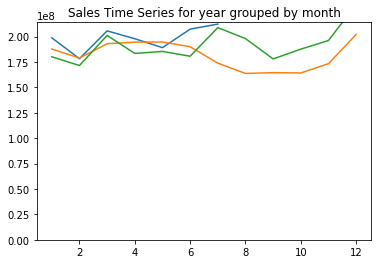

In [67]:
plot_multiple_sales_time_series(
    df_to_plot=df_train,
    segmentation_col='year',
    grouping_col='month'
)

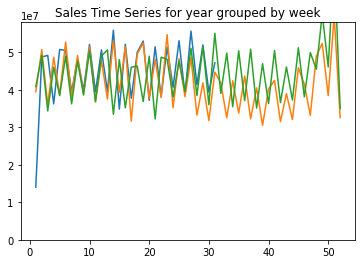

In [68]:
plot_multiple_sales_time_series(
    df_to_plot=df_train,
    segmentation_col='year',
    grouping_col='week'
)

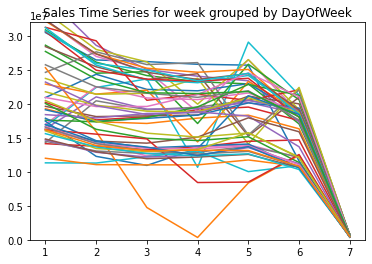

In [69]:
plot_multiple_sales_time_series(
    df_to_plot=df_train[df_train['Open']==1],
    segmentation_col='week',
    grouping_col='DayOfWeek'
)

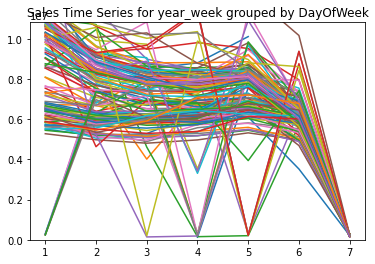

In [70]:
plot_multiple_sales_time_series(
    df_to_plot=df_train[df_train['Open']==1],
    segmentation_col='year_week',
    grouping_col='DayOfWeek'
)

In [79]:
df_train.groupby('year')['year'].count()

year
2013    406974
2014    373855
2015    236380
Name: year, dtype: int64

In [ ]:
df_train.groupby('year_month')['year_month'].count()

In [84]:
df_train.groupby('year_week')['year_week'].count()

year_week
2013-01    8919
2013-02    7805
2013-03    7805
2013-04    7805
2013-05    7805
           ... 
2015-27    7805
2015-28    7805
2015-29    7805
2015-30    7805
2015-31    5575
Name: year_week, Length: 135, dtype: int64

In [75]:
df_test = apply_date_format(df=df_test)

41088

In [ ]:
df_test.groupby('year')['year'].count()

In [85]:
df_test.groupby('month')['month'].count()

month
8    26536
9    14552
Name: month, dtype: int64

In [82]:
df_test.groupby('year_month')['year_month'].count()

year_month
2015-08    26536
2015-09    14552
Name: year_month, dtype: int64

In [83]:
df_test.groupby('year_week')['year_week'].count()

year_week
2015-31    1712
2015-32    5992
2015-33    5992
2015-34    5992
2015-35    5992
2015-36    5992
2015-37    5992
2015-38    3424
Name: year_week, dtype: int64

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,year,month,week,year_month,year_week
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
1,2,3,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
2,3,7,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
3,4,8,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
4,5,9,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
5,6,10,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
6,7,11,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
7,8,12,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
8,9,13,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
9,10,14,4,2015-09-17,1.0,1,0,0,2015,9,38,2015-09,2015-38
